In [12]:
import pandas as pd
import numpy as np

In [13]:
data = pd.read_hdf(r"20160607roadnet.h5")

In [14]:
print(data)

           lon        lat  count
0   122.019528  38.188689    0.0
1   122.018351  38.190219    0.0
2   122.017174  38.191749    0.0
3   122.018298  38.192186    0.0
4   122.020656  38.193490    0.0
..         ...        ...    ...
95  120.446174  39.107302  397.0
96  120.442741  39.110236  397.0
97  120.439183  39.113419  397.0
98  120.437934  39.112889  397.0
99  120.421018  39.107236  397.0

[10511 rows x 3 columns]


In [ ]:
#This section can be used to rotate the images if the dataset size is small.
def flip180(arr):
    new_arr = arr.reshape(arr.size)
    new_arr = new_arr[::-1]
    new_arr = new_arr.reshape(arr.shape)
    return new_arr

def flip90_left(arr):
    new_arr = np.transpose(arr)
    new_arr = new_arr[::-1]
    return new_arr

def flip90_right(arr):
    new_arr = arr.reshape(arr.size)
    new_arr = new_arr[::-1]
    new_arr = new_arr.reshape(arr.shape)
    new_arr = np.transpose(new_arr)[::-1]
    return new_arr


In [15]:
data = data.reset_index(drop = True)
data['loc_x'] = pd.cut(data['lat'], 1024, labels=False) #1024->8192 lat
data['loc_y'] = pd.cut(data['lon'], 1024, labels=False) #1024->8192 lon
print(data)

              lon        lat  count  loc_x  loc_y
0      122.019528  38.188689    0.0    406    711
1      122.018351  38.190219    0.0    406    711
2      122.017174  38.191749    0.0    407    711
3      122.018298  38.192186    0.0    407    711
4      122.020656  38.193490    0.0    407    711
...           ...        ...    ...    ...    ...
10506  120.446174  39.107302  397.0    628    453
10507  120.442741  39.110236  397.0    629    452
10508  120.439183  39.113419  397.0    630    451
10509  120.437934  39.112889  397.0    630    451
10510  120.421018  39.107236  397.0    628    448

[10511 rows x 5 columns]


If the parameter is lon; lat then it is mirror processing.

In [18]:
# point_png
import cv2
import os
point = np.zeros((1024,1024)) #1024->8192
cell = data.groupby(['loc_x','loc_y'])
for loc,group in cell:
    point[loc[1]][loc[0]] = len(group) #0 1
point = point / 2 * 255
point[point > 255] = 255
#point = flip180(point)
cv2.imwrite(r'articlepics/roadnetpoint.png', point)

True

In [16]:
import math
def distence(lon_1,lat_1,lon_2,lat_2):
    a = math.radians(lat_1)-math.radians(lat_2)
    b = math.radians(lon_1)-math.radians(lon_2)
    r = 6378137
    temp = (math.sin(a/2))**2+((math.sin(b/2))**2)*math.cos(lat_1)*math.cos(lat_2)
    if temp>1:
        temp =1
    elif temp<0:
        temp = 0
    temp = 2*math.asin(temp**0.5)*r
    return temp

In [17]:
# Draw line.png
import cv2
import os
line_img = np.zeros((1024,1024), dtype=np.uint8)#1024->8192
ship_count = 0
#print(data)
ship_group = data.groupby('count') #mmsi
for mmsi,group in ship_group:
    #group = group.sort_values(axis = 0,ascending = False,by = ['utc'])
    group = group.reset_index(drop = True)
    temp = np.zeros((1024,1024), dtype=np.uint8)#1024->8192
    for i in range(len(group)):
        if i != len(group)-1:
            now_lon = group.loc[i,'lon']
            now_lat = group.loc[i,'lat']
            now_x = group.loc[i,'loc_x']
            now_y = group.loc[i,'loc_y']
            next_lon = group.loc[i+1,'lon']
            next_lat = group.loc[i+1,'lat']
            next_x = group.loc[i+1,'loc_x']
            next_y = group.loc[i+1,'loc_y']
            dist = distence(now_lon,now_lat,next_lon,next_lat)
            if 25<=dist<=20000: # 200-20000
                cv2.line(temp, (now_x,now_y), (next_x,next_y), 128, 1, lineType=cv2.LINE_AA)
    line_img = cv2.add(line_img,temp)
    ship_count += 1
    if ship_count % 10 ==0:
        print(ship_count)
#line_img=flip180(line_img)
cv2.imwrite(r'articlepics/20160607roadnet2.png', line_img)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390


True

In [ ]:
data = data.reset_index(drop = True)
data['loc_x'] = pd.cut(data['lon'], 4096, labels=False) #1024->8192 lat
data['loc_y'] = pd.cut(data['lat'], 4096, labels=False) #1024->8192 lon
print(data)

               utc       mmsi         lon        lat  loc_x  loc_y
0       1454257939  273338510  121.870667  39.005092   2911   2438
1       1454258125  273338510  121.870642  39.005075   2911   2438
2       1454258301  273338510  121.870657  39.005090   2911   2438
3       1454258479  273338510  121.870652  39.005053   2911   2438
4       1454258654  273338510  121.870650  39.005097   2911   2438
...            ...        ...         ...        ...    ...    ...
523952  1454811049  677063700  122.432588  36.826335   3302    317
523953  1454812135  677063700  122.432580  36.826308   3302    317
523954  1454813215  677063700  122.432602  36.826292   3302    317
523955  1454815014  677063700  122.432602  36.826345   3302    317
523956  1454816097  677063700  122.432648  36.826278   3302    317

[523957 rows x 6 columns]


If the parameter is lon; lat then it is mirror processing.

In [ ]:
# speed threshold
speed_list = []
ship_count = 0
ship_group = data.groupby('mmsi')
for mmsi,group in ship_group:
    group = group.sort_values(axis = 0,ascending = False,by = ['utc'])
    group = group.reset_index(drop = True)
    temp = np.zeros((4096,4096), dtype=np.uint8)#1024->8192
    for i in range(len(group)):
        if i != len(group)-1:
            now_lon = group.loc[i,'lon']
            now_lat = group.loc[i,'lat']
            now_x = group.loc[i,'loc_x']
            now_y = group.loc[i,'loc_y']
            now_time = group.loc[i,'utc']
            next_lon = group.loc[i+1,'lon']
            next_lat = group.loc[i+1,'lat']
            next_x = group.loc[i+1,'loc_x']
            next_y = group.loc[i+1,'loc_y']
            next_time = group.loc[i+1,'utc']
            dist = distence(now_lon,now_lat,next_lon,next_lat)
            if 25<=dist<=20000:
                speed = dist/(abs(now_time-next_time))
                speed_list.append(speed)
    ship_count += 1
    if ship_count % 10 ==0:
        print(ship_count)
data_speed = pd.DataFrame({'speed':speed_list})
data_speed

10
20
30
40
50
60
70


,speed
0,7.706997
1,7.961044
2,7.958187
3,7.955326
4,7.952461
...,...
217382,0.021732
217383,0.003901
217384,0.020543
217385,0.008921


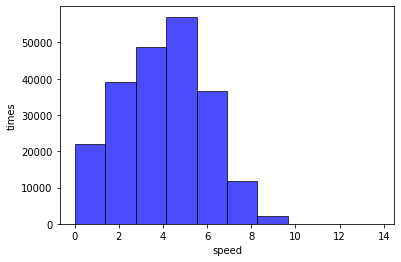

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
data = np.random.randn(10000)
"""
plt.hist(speed_list, facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("speed")
plt.ylabel("times")
# plt.title("Frequency/Frequency distribution histogram ")
plt.show()

In [ ]:
count = 0
count_0 = 0
for i, row in data_speed.T.iteritems():
    if row['speed'] < 1:
        count += 1
    
    if row['speed'] == 0:
        count_0 += 1

print(count)
print(count_0)


12755
0


In [ ]:
print(max(data_speed['speed']))

13.790965623625715


In [ ]:
data_speed['cut'] = pd.cut(data_speed['speed'], 1024, labels=False)#1024->8192
dict_2 = dict()
data_speed = data_speed.sort_values(axis = 0,ascending = False,by = ['cut'])
cut_group = data_speed.groupby('cut')
for cut,group in cut_group:
    dict_2[cut] = len(group)
dict_2

In [ ]:
long = max(speed_list)-min(speed_list)
print(long/1024*1)#1024->8192

0.013467689513938496


In [ ]:
# speed.npy
speed_data = np.zeros((4096, 4096, 1), dtype=np.float)#1024->8192
count_data = np.zeros((4096, 4096, 1), dtype=np.float)
ship_count = 0
over_speed = 0
for mmsi,group in ship_group:
    group = group.sort_values(axis = 0,ascending = False,by = ['utc'])
    group = group.reset_index(drop = True)
    temp = np.zeros((4096,4096), dtype=np.uint8)
    for i in range(len(group)):
        if i != len(group)-1:
            now_lon = group.loc[i,'lon']
            now_lat = group.loc[i,'lat']
            now_x = group.loc[i,'loc_x']
            now_y = group.loc[i,'loc_y']
            now_time = group.loc[i,'utc']
            next_lon = group.loc[i+1,'lon']
            next_lat = group.loc[i+1,'lat']
            next_x = group.loc[i+1,'loc_x']
            next_y = group.loc[i+1,'loc_y']
            next_time = group.loc[i+1,'utc']
            dist = distence(now_lon,now_lat,next_lon,next_lat)
            if 25<=dist<=20000:
                speed = dist/(abs(now_time-next_time))
                if speed*3.6 > 50 :
                    continue
                else:
                    speed_data[now_x][now_y] += speed
                    count_data[now_x][now_y] += 1
                #print(now_x, now_y)
                #print(count_data[now_x][now_y])
    ship_count += 1
    if ship_count % 10 ==0:
        print(ship_count)
speed_data = np.divide(speed_data, count_data, out=np.zeros_like(speed_data), where=count_data != 0)

#speed_data = flip180(speed_data)
np.save(r'speed.npy', speed_data)


10
20
30
40
50
60
70


In [ ]:
import cv2
speed_data[speed_data > 0] = 255
cv2.imwrite(r'test/speed.png', speed_data)

True

In [ ]:
# direction.npy
ship_group = data.groupby('mmsi')
def bearing(lat_1,lng_1,lat_2,lng_2):
    pt_a_lat_rad = math.radians(lat_1)
    pt_a_lng_rad = math.radians(lng_1)
    pt_b_lat_rad = math.radians(lat_2)
    pt_b_lng_rad = math.radians(lng_2)
    y = math.sin(pt_b_lng_rad - pt_a_lng_rad) * math.cos(pt_b_lat_rad)
    x = math.cos(pt_a_lat_rad) * math.sin(pt_b_lat_rad) - math.sin(pt_a_lat_rad) * math.cos(pt_b_lat_rad) * math.cos(pt_b_lng_rad - pt_a_lng_rad)
    bearing_rad = math.atan2(y, x)
    return math.fmod(math.degrees(bearing_rad) + 360.0, 360.0)
dir_data = np.zeros((4096,4096, 8), dtype=np.uint8)#1024->8192
ship_count = 0
for mmsi,group in ship_group:
    group = group.sort_values(axis = 0,ascending = False,by = ['utc'])
    group = group.reset_index(drop = True)
    temp = np.zeros((4096,4096), dtype=np.uint8)#1024->8192
    for i in range(len(group)):
        if i != len(group)-1:
            now_lon = group.loc[i,'lon']
            now_lat = group.loc[i,'lat']
            now_x = group.loc[i,'loc_x']
            now_y = group.loc[i,'loc_y']
            now_time = group.loc[i,'utc']
            next_lon = group.loc[i+1,'lon']
            next_lat = group.loc[i+1,'lat']
            next_x = group.loc[i+1,'loc_x']
            next_y = group.loc[i+1,'loc_y']
            next_time = group.loc[i+1,'utc']
            dist = distence(now_lon,now_lat,next_lon,next_lat)
            if 25<=dist<=20000:
                direction = int(((bearing(now_lat,now_lon,next_lat,next_lon) + 22.5) % 360) // 45)
                dir_data[now_x,now_y,direction] += 1
    ship_count += 1
    if ship_count % 10 ==0:
        print(ship_count)
#dir_data = flip180(dir_data)
np.save(r'direction.npy', dir_data)

10
20
30
40
50
60
70


In [ ]:
import cv2
dir_data = dir_data.reshape(4096,32768)
dir_data[dir_data > 0] = 255
cv2.imwrite(r'test/direction.png', dir_data)

True

In [ ]:
def get_index(dev_x,dev_y):
    center_x = 0
    center_y = 0
    if 0<dev_x<=4 and 0<dev_y<=4:
        center_x = 4
        center_y = 3
        dev_x -= 1
        dev_y -= 1
        return center_x+dev_x,center_y-dev_y
    elif -4<=dev_x<0 and 0<dev_y<=4:
        center_x = 3
        center_y = 3
        dev_x += 1
        dev_y -= 1
        return center_x+dev_x,center_y-dev_y
    elif -4<=dev_x<0 and -4<=dev_y<0:
        center_x = 3
        center_y = 4
        dev_x += 1
        dev_y += 1
        return center_x+dev_x,center_y-dev_y
    elif 0<dev_x<=4 and -4<=dev_y<0:
        center_x = 4
        center_y = 4
        dev_x -= 1
        dev_y += 1
        return center_x+dev_x,center_y-dev_y
    else:
        return None

In [ ]:
# transition.npy
transit_data = np.zeros((4096,4096, 8, 8, 2),dtype=np.uint8)#1024->8192
ship_count = 0
for mmsi,group in ship_group:
    group = group.sort_values(axis = 0,ascending = False,by = ['utc'])
    group = group.reset_index(drop = True)
    for i in range(len(group)):
        if i != len(group)-1:
            now_lon = group.loc[i,'lon']
            now_lat = group.loc[i,'lat']
            now_x = group.loc[i,'loc_x']
            now_y = group.loc[i,'loc_y']
            now_time = group.loc[i,'utc']
            next_lon = group.loc[i+1,'lon']
            next_lat = group.loc[i+1,'lat']
            next_x = group.loc[i+1,'loc_x']
            next_y = group.loc[i+1,'loc_y']
            next_time = group.loc[i+1,'utc']
            dist = distence(now_lon,now_lat,next_lon,next_lat)
            if 25<=dist<=20000:
                dev_x = now_x-next_x
                dev_y = now_y-next_y
                if get_index(dev_x,dev_y) != None:
                    now_loc_x,now_loc_y = get_index(dev_x,dev_y)
                    transit_data[now_x,now_y,now_loc_x,now_loc_y,0] = 1
                    next_loc_x,next_loc_y = get_index(-dev_x,-dev_y)
                    transit_data[next_x,next_y,next_loc_x,next_loc_y,1] = 1
    ship_count += 1
    if ship_count % 10 ==0:
        print(ship_count)
transit_data = flip180(transit_data)
np.save(r'transition_flip180.npy', transit_data)

10
20
30
40
50
60
70


In [ ]:
import cv2
transit_data = transit_data.reshape(8192,16384)
transit_data[transit_data > 0] = 255
cv2.imwrite(r'0729TestFeatures/transition.png', transit_data)

True